In [3]:
! pip install openai

In [4]:
! pip install langchain_community

In [5]:
! pip install langchain_chroma

In [4]:
! pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.7 MB/s eta 0:00:00


In [2]:
! pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.7/408.7 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.13
    Uninstalling langchain-core-0.3.13:
      Successfully uninstalled langchain-core-0.3.13
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.4
    Uninstalling langchain-0.3.4:
      Successfully uninstalled langchain-0.3.4


In [20]:
! pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.7/615.7 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.1 MB/s eta 0:00:

# Decomposition

In RAG tasks, we often encounter complex questions that require in-depth analysis and the gathering of information from various sources. This is where decomposition comes into play. Decomposition is a powerful technique that breaks down a large, intricate problem into smaller, more manageable sub-problems. By addressing these sub-problems independently, we can simplify the overall task and ultimately create a more comprehensive and accurate response.

What is decomposition?
In the context of RAG, decomposition involves dividing a primary question into a series of smaller, more focused sub-questions. Each sub-question can be answered independently, and the answers are then combined to form a comprehensive response to the original question. This approach offers several advantages:

Enhanced efficiency: By tackling smaller sub-problems, the retrieval and generation processes become more efficient as the system focuses on specific aspects of the main question.

Improved accuracy: Decomposing the question allows for a deeper exploration of each sub-question, potentially leading to more accurate and relevant answers.

Structured response: Decomposition facilitates the organization of the final answer by presenting the sub-questions and their corresponding answers in a clear, structured format.

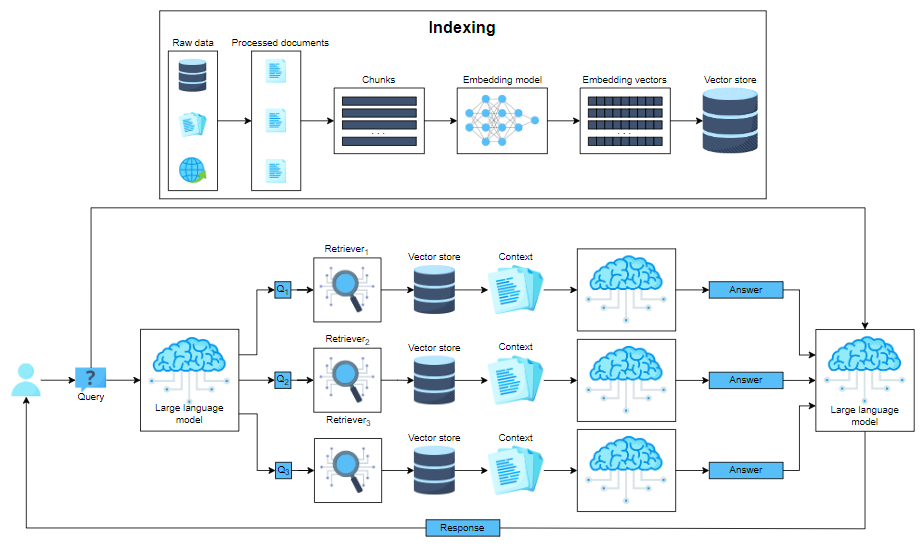

# Import necessary libraries

In [5]:
import os
import bs4
from langchain_community.document_loaders import WebBaseLoader
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma
from langchain import hub
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough, RunnableLambda

# Set up the LangSmith and OpenAI API keys

The following code snippet sets up your LangChain API key and OpenAI API key from environment variables. We’ll need valid API keys to interact with the LangChain and OpenAI language models

Code Explanation :

Sets up the LangChain environment variables:

LANGCHAIN_TRACING_V2: Enables tracing for LangChain operations.

LANGCHAIN_ENDPOINT: Specifies the endpoint for the LangChain API.

LANGCHAIN_API_KEY: An empty string placeholder for the LangSmith LangChain API key. Replace it with your actual key.

LANGCHAIN_PROJECT: Sets the project name for LangChain operations to 'Multi-Query'.

LSets up the OpenAI API key:

OPENAI_API_KEY: An empty string placeholder for the OpenAI API key. Replace it with your actual key.

Validation: Checks if the OPENAI_API_KEY is empty and raises a ValueError if it is, ensure a valid API key is provided for authenticating OpenAI API requests.

In [6]:
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_ENDPOINT'] = 'https://api.smith.langchain.com'
os.environ['LANGCHAIN_API_KEY'] = '' # Add your LangSmith LangChain API key
os.environ['LANGCHAIN_PROJECT']='Decomposition'

OPENAI_API_KEY = os.environ["OPENAI_API_KEY"] = ""  # Add your OpenAI API key
if OPENAI_API_KEY == "":
    raise ValueError("Please set the OPENAI_API_KEY environment variable")

# Load the data

we’ll load the document containing information relevant to our main question’s topic. We’ll use a web document loader to fetch the content from a specific URL



In [7]:
loader = WebBaseLoader(
    web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
)

blog_docs = loader.load()

In [11]:
blog_docs[0].page_content

'\n\n\n\n\n\nLLM Powered Autonomous Agents | Lil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\nemojisearch.app\n\n\n\n\n\n\n\n\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nAgent System Overview\n\nComponent One: Planning\n\nTask Decomposition\n\nSelf-Reflection\n\n\nComponent Two: Memory\n\nTypes of Memory\n\nMaximum Inner Product Search (MIPS)\n\n\nComponent Three: Tool Use\n\nCase Studies\n\nScientific Discovery Agent\n\nGenerative Agents Simulation\n\nProof-of-Concept Examples\n\n\nChallenges\n\nCitation\n\nReferences\n\n\n\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as ins

# Split Text

In [14]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=1000,
    chunk_overlap=100)

splits = text_splitter.split_documents(blog_docs)

In [15]:
len(splits)

16

In [16]:
splits[0].page_content

"LLM Powered Autonomous Agents | Lil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\nemojisearch.app\n\n\n\n\n\n\n\n\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nAgent System Overview\n\nComponent One: Planning\n\nTask Decomposition\n\nSelf-Reflection\n\n\nComponent Two: Memory\n\nTypes of Memory\n\nMaximum Inner Product Search (MIPS)\n\n\nComponent Three: Tool Use\n\nCase Studies\n\nScientific Discovery Agent\n\nGenerative Agents Simulation\n\nProof-of-Concept Examples\n\n\nChallenges\n\nCitation\n\nReferences\n\n\n\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring example

In [18]:
splits[14].page_content

'Citation#\nCited as:\n\nWeng, Lilian. (Jun 2023). “LLM-powered Autonomous Agents”. Lil’Log. https://lilianweng.github.io/posts/2023-06-23-agent/.\n\nOr\n@article{weng2023agent,\n  title   = "LLM-powered Autonomous Agents",\n  author  = "Weng, Lilian",\n  journal = "lilianweng.github.io",\n  year    = "2023",\n  month   = "Jun",\n  url     = "https://lilianweng.github.io/posts/2023-06-23-agent/"\n}\nReferences#\n[1] Wei et al. “Chain of thought prompting elicits reasoning in large language models.” NeurIPS 2022\n[2] Yao et al. “Tree of Thoughts: Dliberate Problem Solving with Large Language Models.” arXiv preprint arXiv:2305.10601 (2023).\n[3] Liu et al. “Chain of Hindsight Aligns Language Models with Feedback\n“ arXiv preprint arXiv:2302.02676 (2023).\n[4] Liu et al. “LLM+P: Empowering Large Language Models with Optimal Planning Proficiency” arXiv preprint arXiv:2304.11477 (2023).\n[5] Yao et al. “ReAct: Synergizing reasoning and acting in language models.” ICLR 2023.\n[6] Google Blog

# Index documents

After splitting the text, we create a vector store to efficiently store and retrieve document chunks. Additionally, we generate embeddings for each chunk to capture its semantic meaning

We use Chroma to create the vector store (vectorstore) with our prepared text chunks (splits) and generate embeddings using OpenAIEmbeddings to capture semantic relationships between words in the text snippets.

Finally, we convert the vector store into a retriever using as_retriever(), enabling the retrieval of documents based on a query embedding

In [21]:
vectorstore = Chroma.from_documents(documents=splits, embedding=OpenAIEmbeddings())

retriever = vectorstore.as_retriever()

# Create sub-questions: Decompose the main question

The core of the decomposition technique lies in breaking down a complex question into smaller, more focused sub-questions. This section demonstrates how we can use an LLM to generate these sub-questions from the main question.

We define a prompt template that instructs the AI language model to break down an input question into three sub-questions. This template helps the AI generate multiple search queries related to the input question.

Creates a prompt template instance (prompt_decomposition) using ChatPromptTemplate.from_template(template).

Creates an instance of a large language model (llm) with a temperature setting of 0, ensuring deterministic output.

Creates a chain of operations (generate_queries_decomposition) using the pipe (|) operator:

prompt_decomposition: Provides the input template for generating sub-questions.

llm: Processes the template and generates the sub-questions.

StrOutputParser: Parses the LLM’s output into a string format.

lambda x: x.split("\n"): Splits the string output into individual lines, assuming each line is a sub-question.

Defines the main question to be decomposed: "What is LangSmith, and why do we need it?".

Executes the chain by invoking.generate_queries_decomposition.invoke({"question":question}), providing the main question as input. The output is a list of sub-questions generated by the LLM.

In [23]:
template = """You are an AI language model assistant that generates multiple sub-questions related to an input question. \n
Your task is to break down the input into five sub-problems / sub-questions that can be answers in isolation. \n
the question is from the topic AI based Multiagent system. \n
Generate multiple search queries related to: {question} \n
Original question: {question}"""

prompt_decomposition = ChatPromptTemplate.from_template(template)

llm = ChatOpenAI(temperature=0)

generate_queries_decomposition = ( prompt_decomposition | llm | StrOutputParser() | (lambda x: x.split("\n")))

question = "What is Task Decomposition, and why do we need it?"

generate_queries_decomposition.invoke({"question":question})

['1. What are the different types of task decomposition methods used in AI-based multiagent systems?',
 '2. How does task decomposition help in improving efficiency and scalability in multiagent systems?',
 '3. What are the challenges associated with task decomposition in the context of multiagent systems?',
 '4. How can task decomposition be applied in real-world scenarios to enhance coordination among multiple agents?',
 '5. What role does task decomposition play in enhancing the overall performance and coordination of multiagent systems?']

# Generate answers for sub-questions

With the sub-questions identified, we can now utilize the document retrieval capabilities to find relevant information for each sub-question. This step involves using the vector store to retrieve documents that provide context for answering each sub-question. Subsequently, we’ll leverage the LLM again to generate answers based on the retrieved documents and the corresponding sub-questions.

The prompt_rag variable is set by pulling a specific prompt template from the LangChain hub using hub.pull("rlm/rag-prompt").

The sub_questions variable is populated by invoking generate_queries_decomposition with the main question. This generates a list of sub-questions.

A loop iterates through each sub-question in sub_questions:

For each sub_question, the retriever.invoke(sub_question) method retrieves relevant documents based on the sub-question.

A new processing chain is created and invoked:

prompt_rag provides the template for generating an answer using the retrieved documents and the sub-question.

llm processes the prompt and documents to generate an answer.

StrOutputParser converts the LLM’s output into a string format.

The generated answer is appended to the rag_results list.

In [24]:
prompt_rag = hub.pull("rlm/rag-prompt")

sub_questions = generate_queries_decomposition.invoke({"question":question})
rag_results = []
for sub_question in sub_questions:
  retrieved_docs = retriever.invoke(sub_question)
  answer = (prompt_rag | llm | StrOutputParser()).invoke({"context": retrieved_docs,
                                                                "question": sub_question})
  rag_results.append(answer)

In [25]:
rag_results

['Task decomposition contributes to the efficiency of AI-based multiagent systems by breaking down complex tasks into smaller, manageable subgoals, allowing for more efficient handling of intricate processes. This approach enables agents to plan ahead by understanding the steps involved in a task, leading to better coordination and execution among multiple agents. By decomposing tasks into simpler steps, agents can utilize more test-time computation and enhance their performance on complex tasks.',
 'The different methods or approaches used for task decomposition in multiagent systems include Chain of Thought (CoT) and Tree of Thoughts for decomposing tasks into smaller steps, prompting LLM with simple instructions, using task-specific instructions, and relying on an external classical planner like LLM+P. These methods aim to break down complex tasks into manageable subgoals, enhance model performance, and utilize external tools for additional information or planning. Self-reflection t

# Merge sub-questions and answers

After generating answers for each sub-question, we must consolidate them into a cohesive format. This step combines the sub-questions and their corresponding answers into a structured representation.

The format function is defined to format the sub-questions and their corresponding answers into a structured string:

The format function takes two lists as inputs: questions (sub-questions) and answers (generated answers).

Initializes an empty string formatted_string.

Iterates through the paired questions and answers using enumerate for numbering:

Uses f-strings to add each question and answer to the formatted string with appropriate numbering.

The strip() method removes any leading or trailing whitespace from the formatted string before returning it.

The format function is called with the sub_questions and rag_results lists. The result is stored in the context variable, which now holds the formatted questions and answers.

In [26]:
def format(questions, answers):
    """Format Q and A"""

    formatted_string = ""
    for i, (question, answer) in enumerate(zip(questions, answers), start=1):
        formatted_string += f"Question {i}: {question}\nAnswer {i}: {answer}\n\n"
    return formatted_string.strip()

In [27]:
context = format(sub_questions, rag_results)
print(context)

Question 1: 1. How does task decomposition contribute to the efficiency of AI-based multiagent systems?
Answer 1: Task decomposition contributes to the efficiency of AI-based multiagent systems by breaking down complex tasks into smaller, manageable subgoals, allowing for more efficient handling of intricate processes. This approach enables agents to plan ahead by understanding the steps involved in a task, leading to better coordination and execution among multiple agents. By decomposing tasks into simpler steps, agents can utilize more test-time computation and enhance their performance on complex tasks.

Question 2: 2. What are the different methods or approaches used for task decomposition in multiagent systems?
Answer 2: The different methods or approaches used for task decomposition in multiagent systems include Chain of Thought (CoT) and Tree of Thoughts for decomposing tasks into smaller steps, prompting LLM with simple instructions, using task-specific instructions, and relyin

# Generate the final answer

Finally, we’ll use the decomposed information (sub-questions and answers) to comprehensively answer the original main question. This step involves feeding all the gathered information into the LLM with a prompt instructing it to synthesize a final answer.

We define a new prompt template using ChatPromptTemplate.from_template. This template instructs the LLM to synthesize a comprehensive answer using the provided context (formatted Q&A pairs) and the original question.

We initialize the prompt variable with the template defined above using ChatPromptTemplate.from_template(template).

A new chain (final_rag_chain) is created using the pipe (|) operator, combining several components:

prompt: The prompt template that guides the LLM to generate the final answer.

llm: The large language model processes the prompt, context, and question to generate a response.

StrOutputParser: Converts the LLM output into a string.

The final_rag_chain.invoke({"context":context,"question":question}) call executes the chain, providing the formatted context (context) and the original question (question) as inputs. The LLM’s output, the final answer to the main question, is printed or used for further processing in your application.

In [28]:
template = """Here is a set of Q and A:
{context}
Use these to synthesize an answer to the question: {question}
"""

prompt = ChatPromptTemplate.from_template(template)

final_rag_chain = (
    prompt
    | llm
    | StrOutputParser()
)


In [29]:
final_rag_chain.invoke({"context":context,"question":question})

'Task decomposition is a process in AI-based multiagent systems where complex tasks are broken down into smaller, manageable subgoals. This approach contributes to the efficiency of these systems by allowing agents to plan ahead, coordinate better, and distribute workload among agents more effectively. Task decomposition helps in improving coordination and collaboration among agents by dividing tasks into simpler steps, enhancing problem-solving capabilities. Various methods like Chain of Thought, Tree of Thoughts, and self-reflection techniques can be used to implement task decomposition in real-world applications, leading to better performance and utilization of resources in multiagent systems. Overall, task decomposition is essential in multiagent systems to enhance efficiency, coordination, and collaboration among agents.'